<a href="https://colab.research.google.com/github/GODxFATHER/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Importing Libraries**

In [2]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [3]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

# Loading The Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the dataset in pandas 
path_n = '/content/drive/MyDrive/DATA_FILES/bank-full.csv'

df = pd.read_csv(path_n)#, encoding = "latin")

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

> **y - has the client subscribed a term deposit? (binary: 'yes','no')**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> **It looks like there are mo missing feature values.**

> **Let's explore how the features relate to the label by creating some box charts.**

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
sd_label = 'y'

In [12]:
num_f = df.describe().columns.to_list()
num_f

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
cat_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
print(cat_f)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [14]:
for col in cat_f:
  # sns.boxplot(x =df[col] , y = df['y'] )
  # plt.title(col)
  print(df[col].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


# **EDA on Fearures**

## **Univariate**



1. **Dependent Variable**

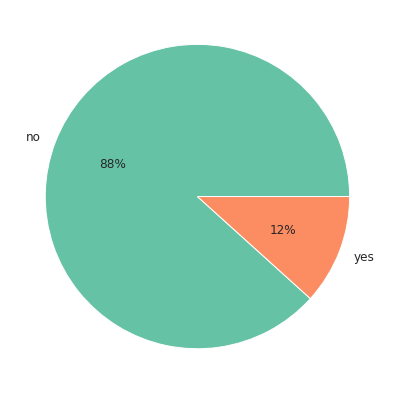

In [15]:
data = df.y.value_counts()
labels = df.y.value_counts().index.to_list()
#define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


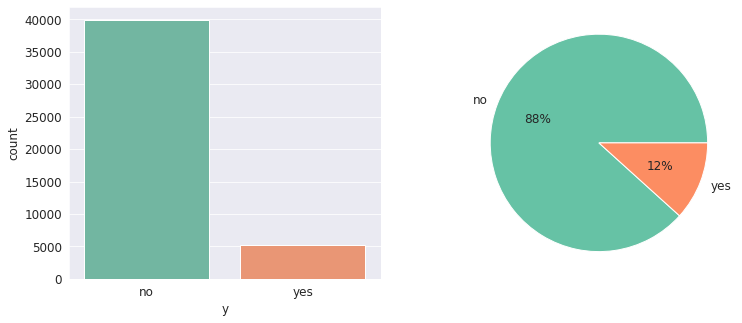

In [16]:
plt.figure(figsize=(19,5))
sns.set_color_codes()
plt.subplot(1, 3, 1)
sns.countplot(df.y,  palette='Set2')#, color = colors)

plt.subplot(1, 3, 2)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

2. Numerical Variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 1368x288 with 0 Axes>

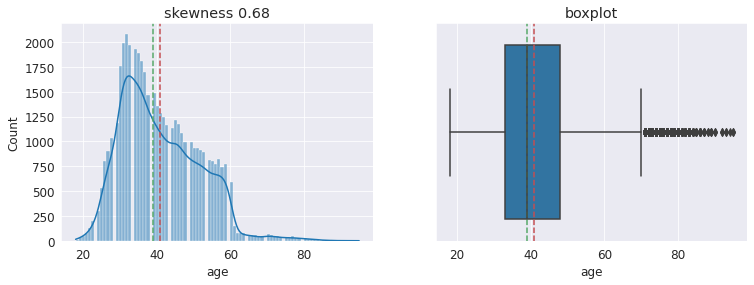

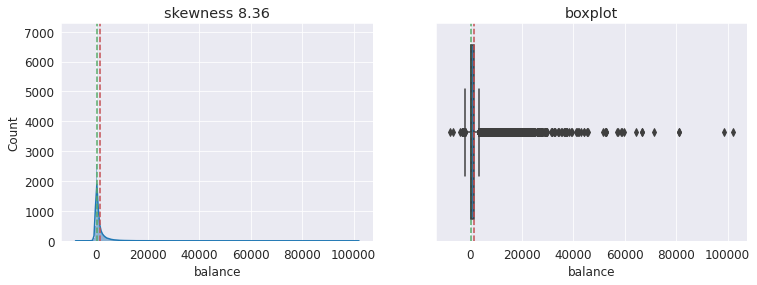

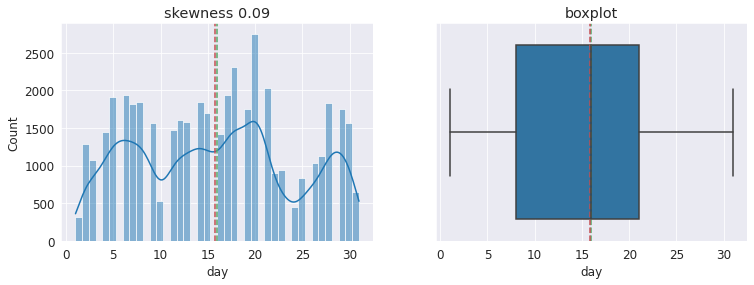

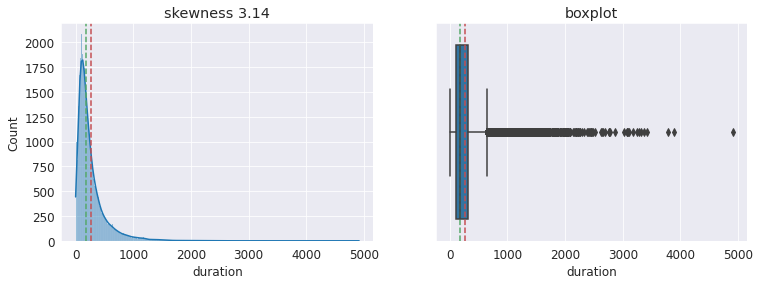

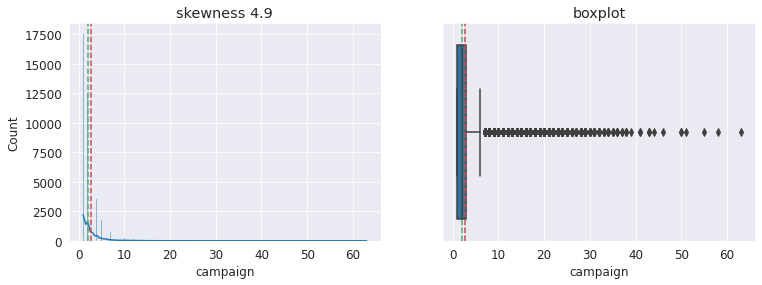

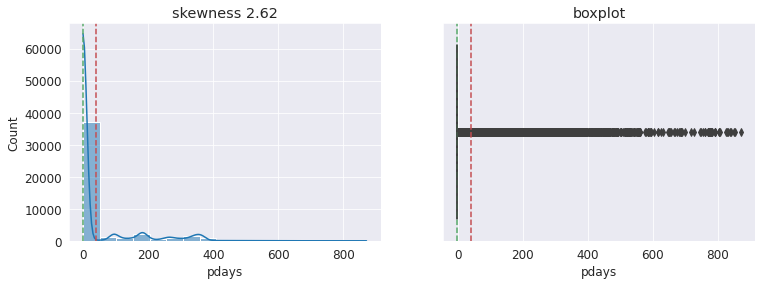

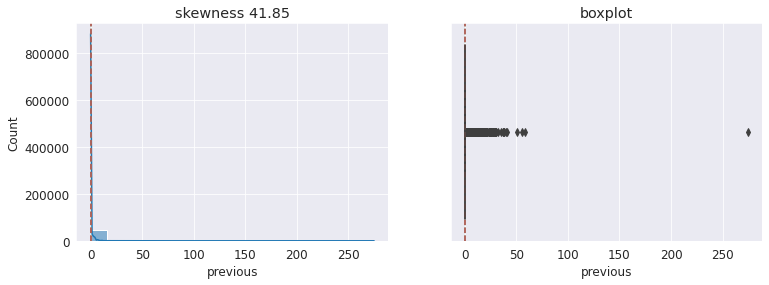

In [17]:
plt.figure(figsize=(19,4))
for col in num_f:

  # sns.boxplot(x = df[col])#, kde=True)
  # plt.title(col+' distplot')
  # plt.show()

    plt.figure(figsize=(19,4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True)
    plt.axvline(np.median(df[col]),color='g', linestyle='--')
    plt.axvline(np.mean(df[col]),color='r', linestyle='--')  
    plt.title(f'skewness {round(df[col].skew(),2)}')

    plt.subplot(1, 3, 2)
    sns.boxplot(df[col])
    plt.axvline(np.median(df[col]),color='g', linestyle='--')
    plt.axvline(np.mean(df[col]),color='r', linestyle='--')  
    plt.title('boxplot')

3. Categorial Variable

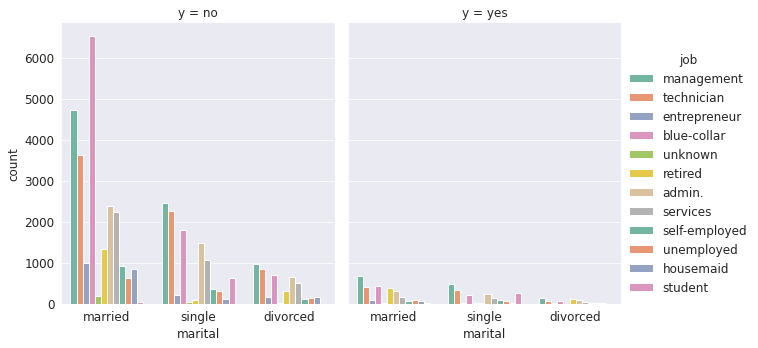

In [18]:
g = sns.catplot(x=cat_f[1], hue=cat_f[0], col="y",data=df, kind="count",height=5, aspect=.9, palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


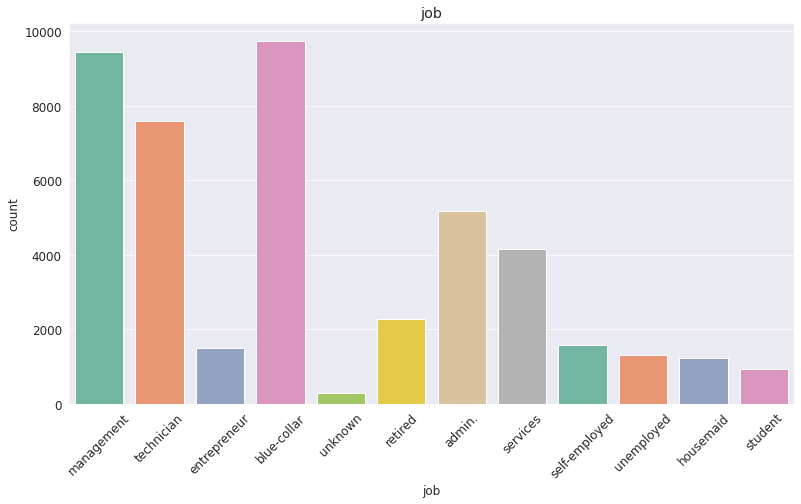

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


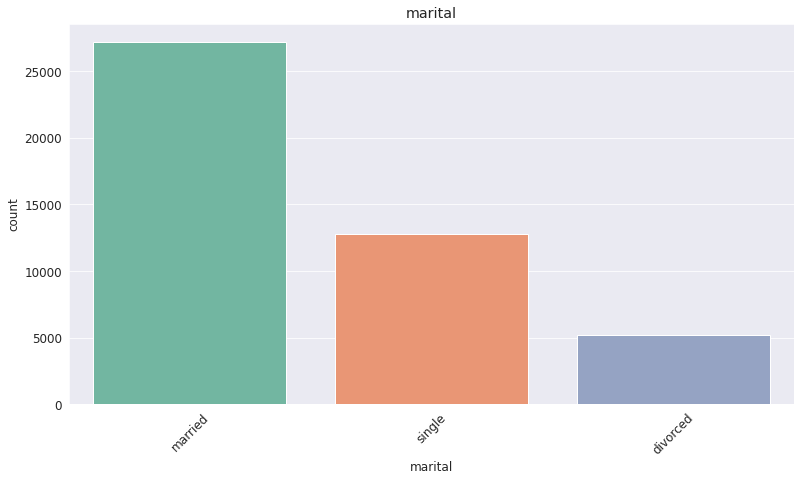

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


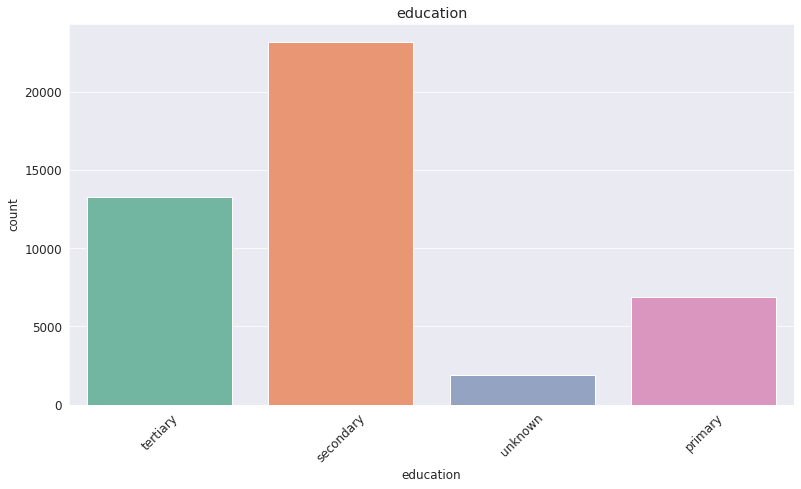

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


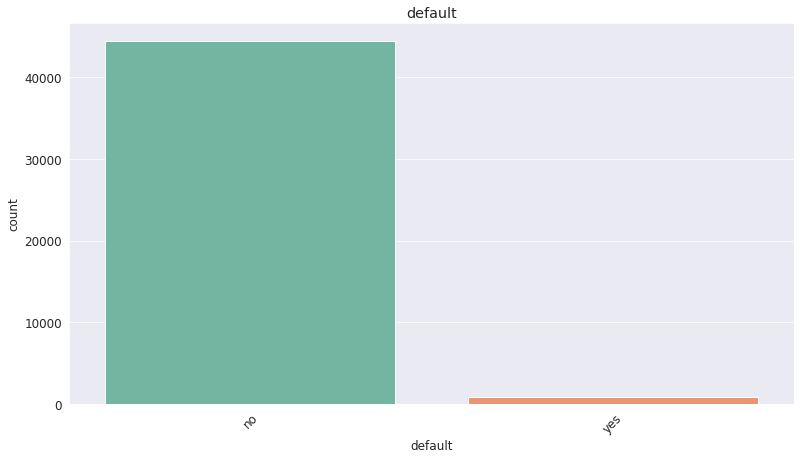

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


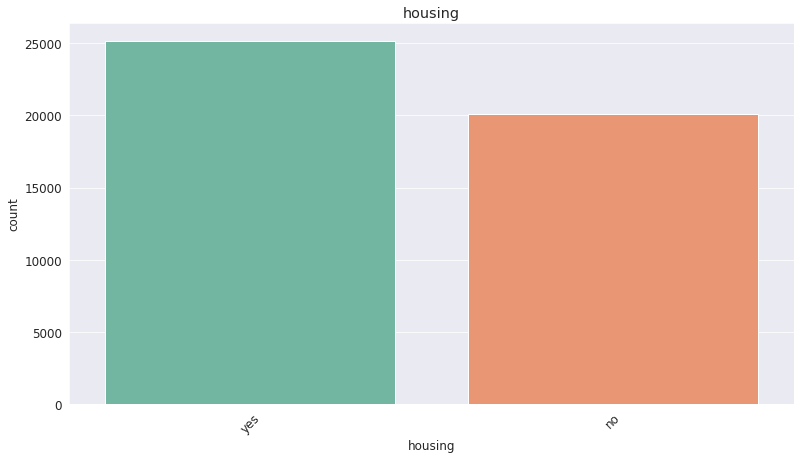

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


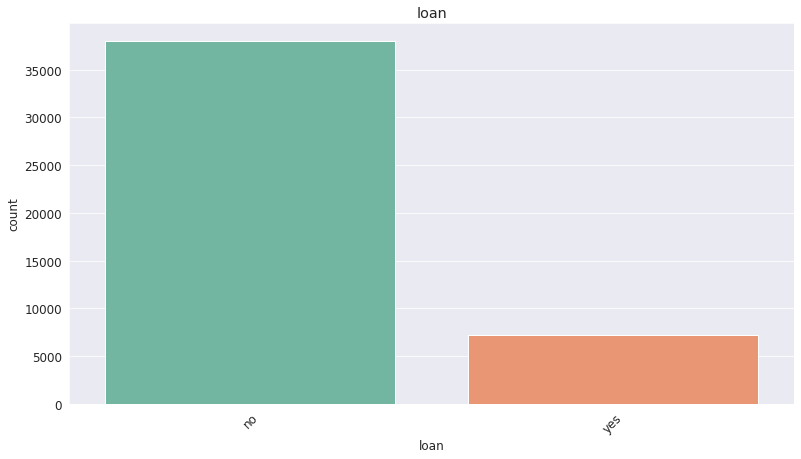

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


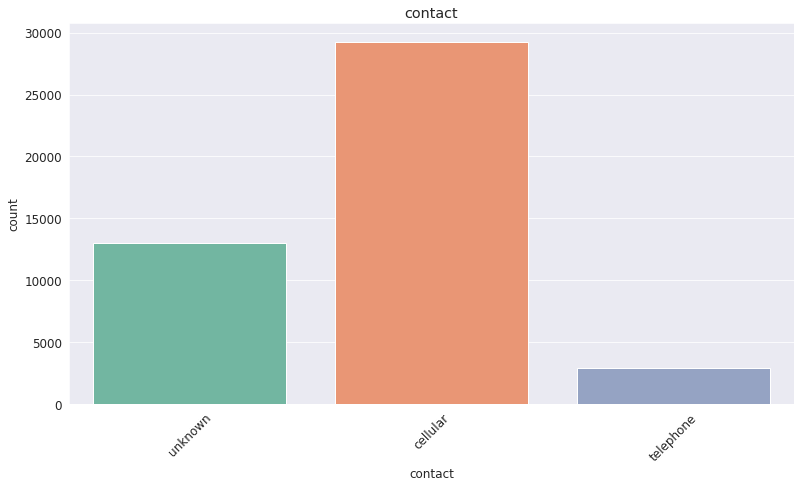

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


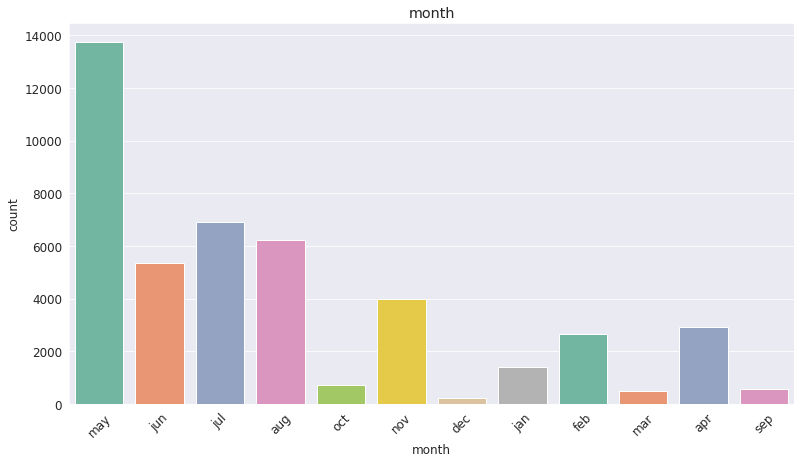

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


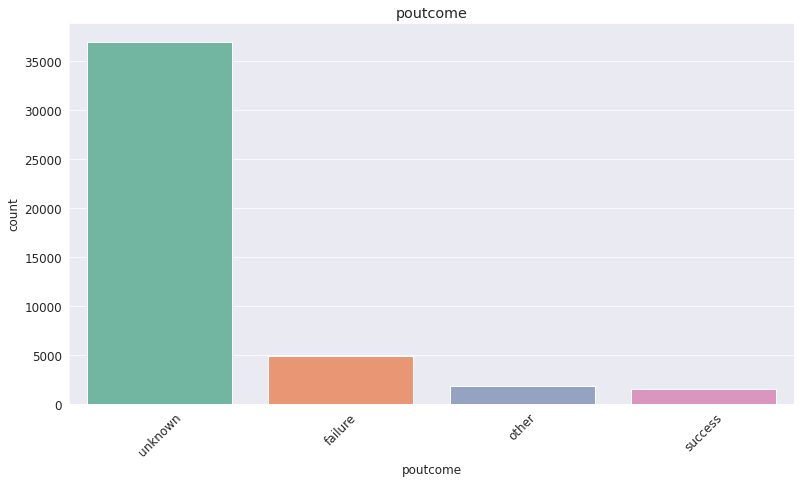

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


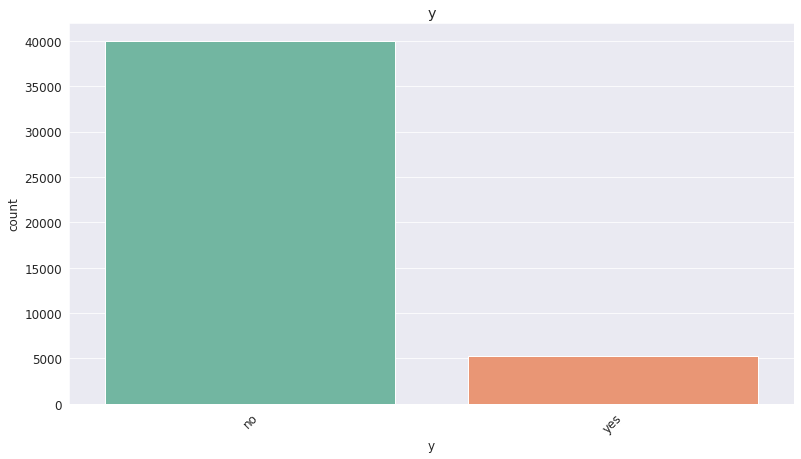

In [19]:
for col in cat_f:
  sns.countplot(df[col], palette="Set2")
  # sns.histplot( y = col, data = df,
  plt.title(col)#+' boxplot')
  plt.xticks(rotation = 45)
  plt.show() 

##Bivariate

1. Numerical Variable vs Dependent Variable

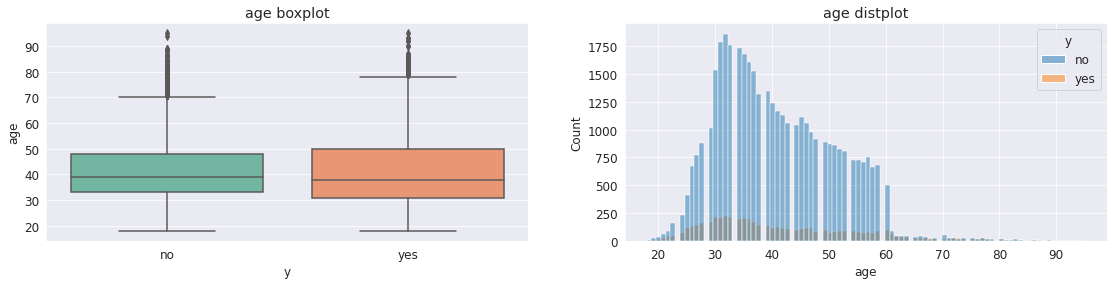

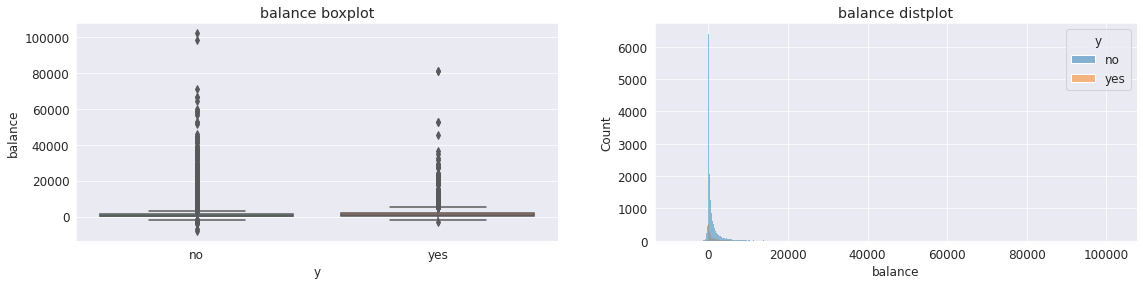

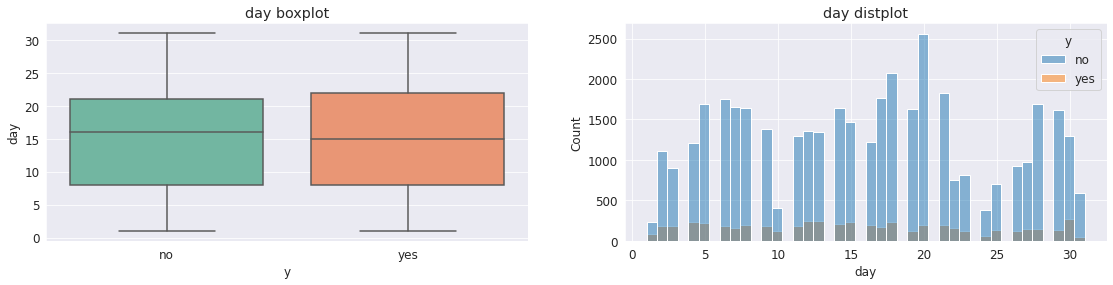

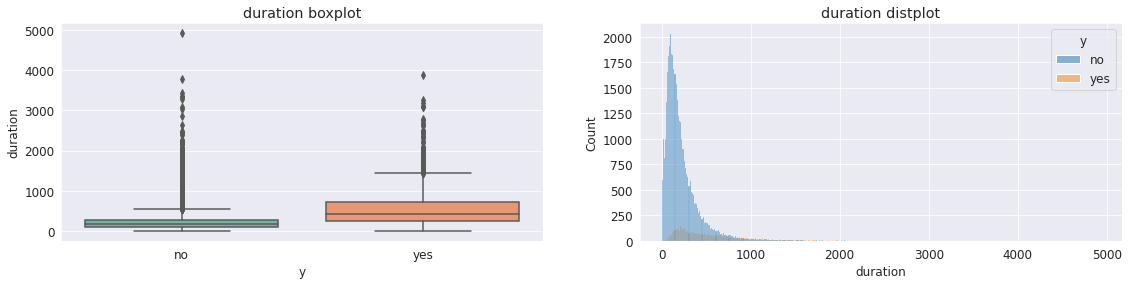

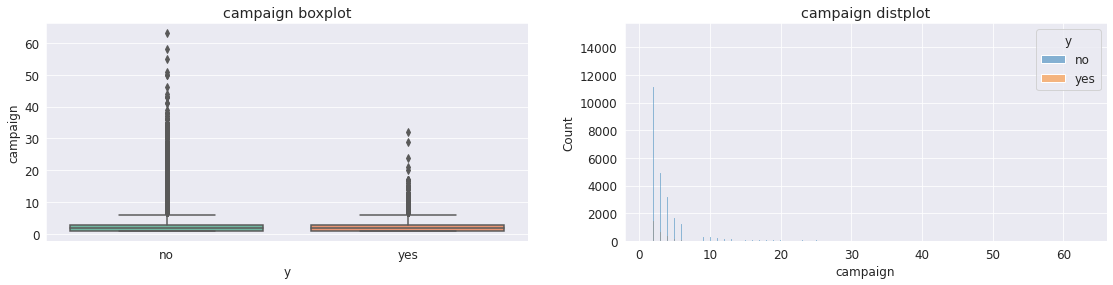

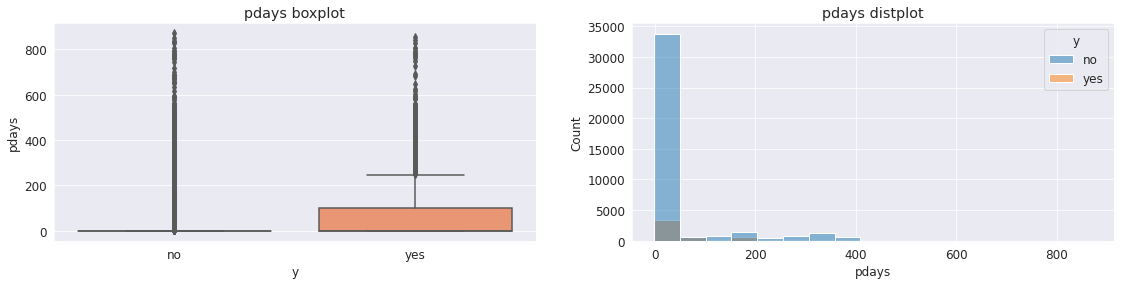

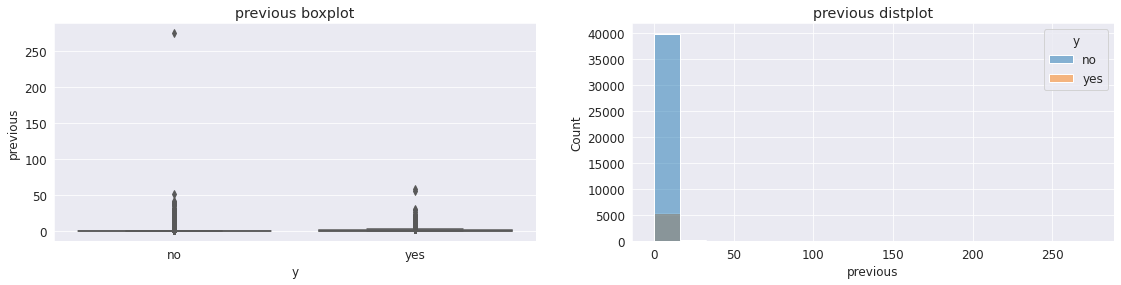

In [20]:
for col in num_f:

  plt.figure(figsize=(19,4))

  plt.subplot(1,2,1)
  # plt.figure(figsize=(5,4))
  sns.boxplot(x = 'y', y = col, data = df,palette="Set2")
  plt.title(col+' boxplot')

  plt.subplot(1,2,2)
  sns.histplot(x = df[col], hue= df['y'])#, kde=True)
  plt.title(col+' distplot')

  plt.show()

2. categorical Variable vs Dependent Variable

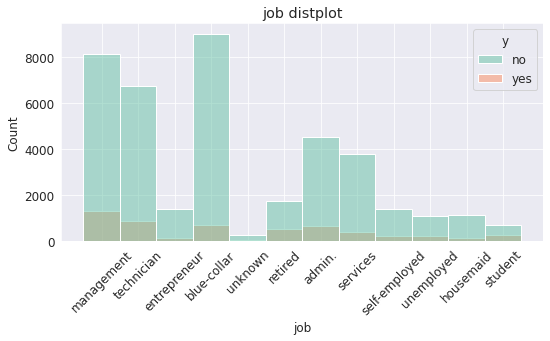

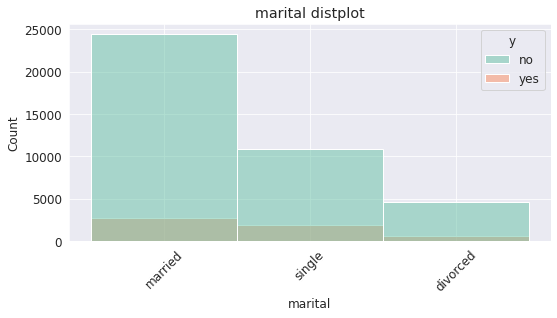

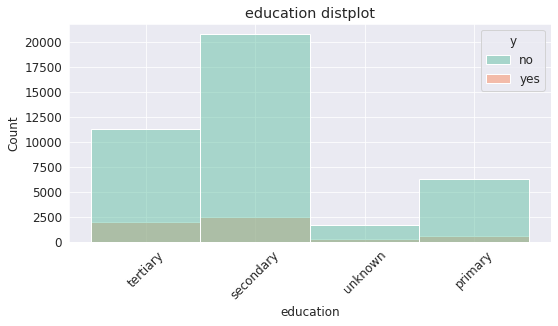

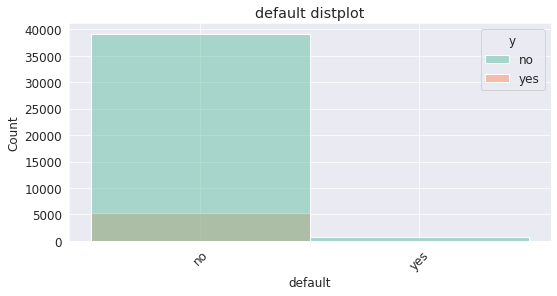

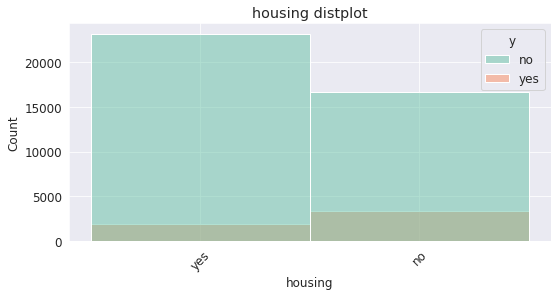

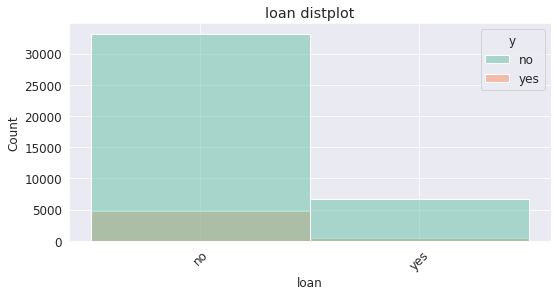

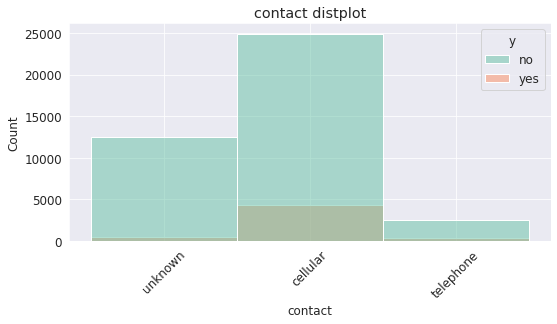

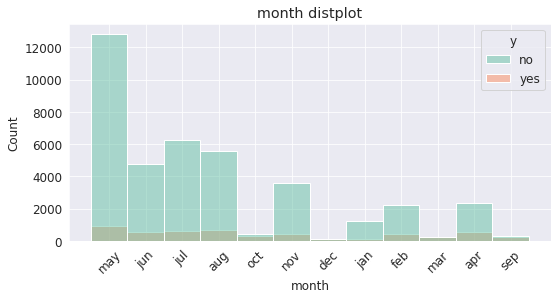

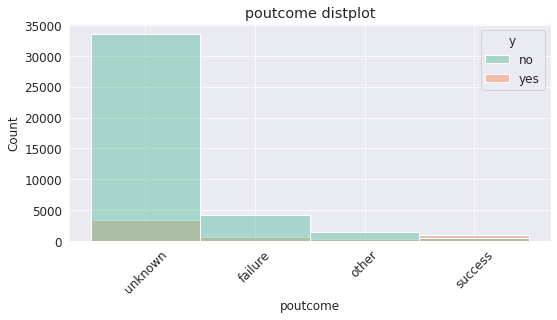

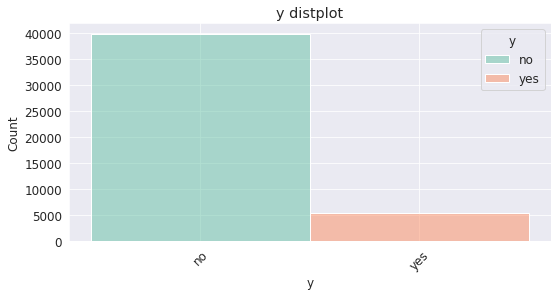

In [21]:
for col in cat_f:

  plt.figure(figsize=(19,4))

  # plt.subplot(1,2,1)
  # plt.figure(figsize=(5,4))
  # sns.boxplot(x = df[col], hue= df['y'])#,palette="Set2")
  # plt.title(col+' boxplot')

  plt.subplot(1,2,1)
  sns.histplot(x = df[col], hue= df['y'],palette="Set2")#, kde=True)
  plt.title(col+' distplot')
  plt.xticks(rotation = 45)

  plt.show()

In [22]:
df[num_f].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##Multivariate (Looking for coreealtion)

In [23]:
df_corr = df.copy()
df_corr['y'] = df_corr.y.apply(lambda x: 1 if x=='yes' else 0)
corr_matrix = df_corr.corr()

corr_matrix['y'].sort_values(ascending=False)

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64

In [24]:
corr_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


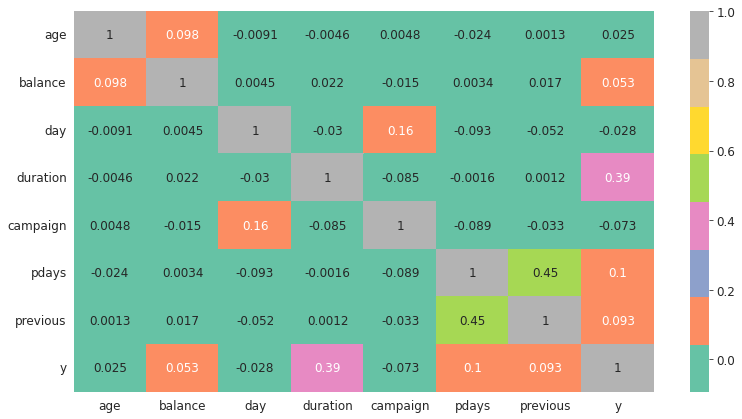

In [25]:
sns.heatmap(data = corr_matrix, annot = True, cmap = "Set2")
plt.show()

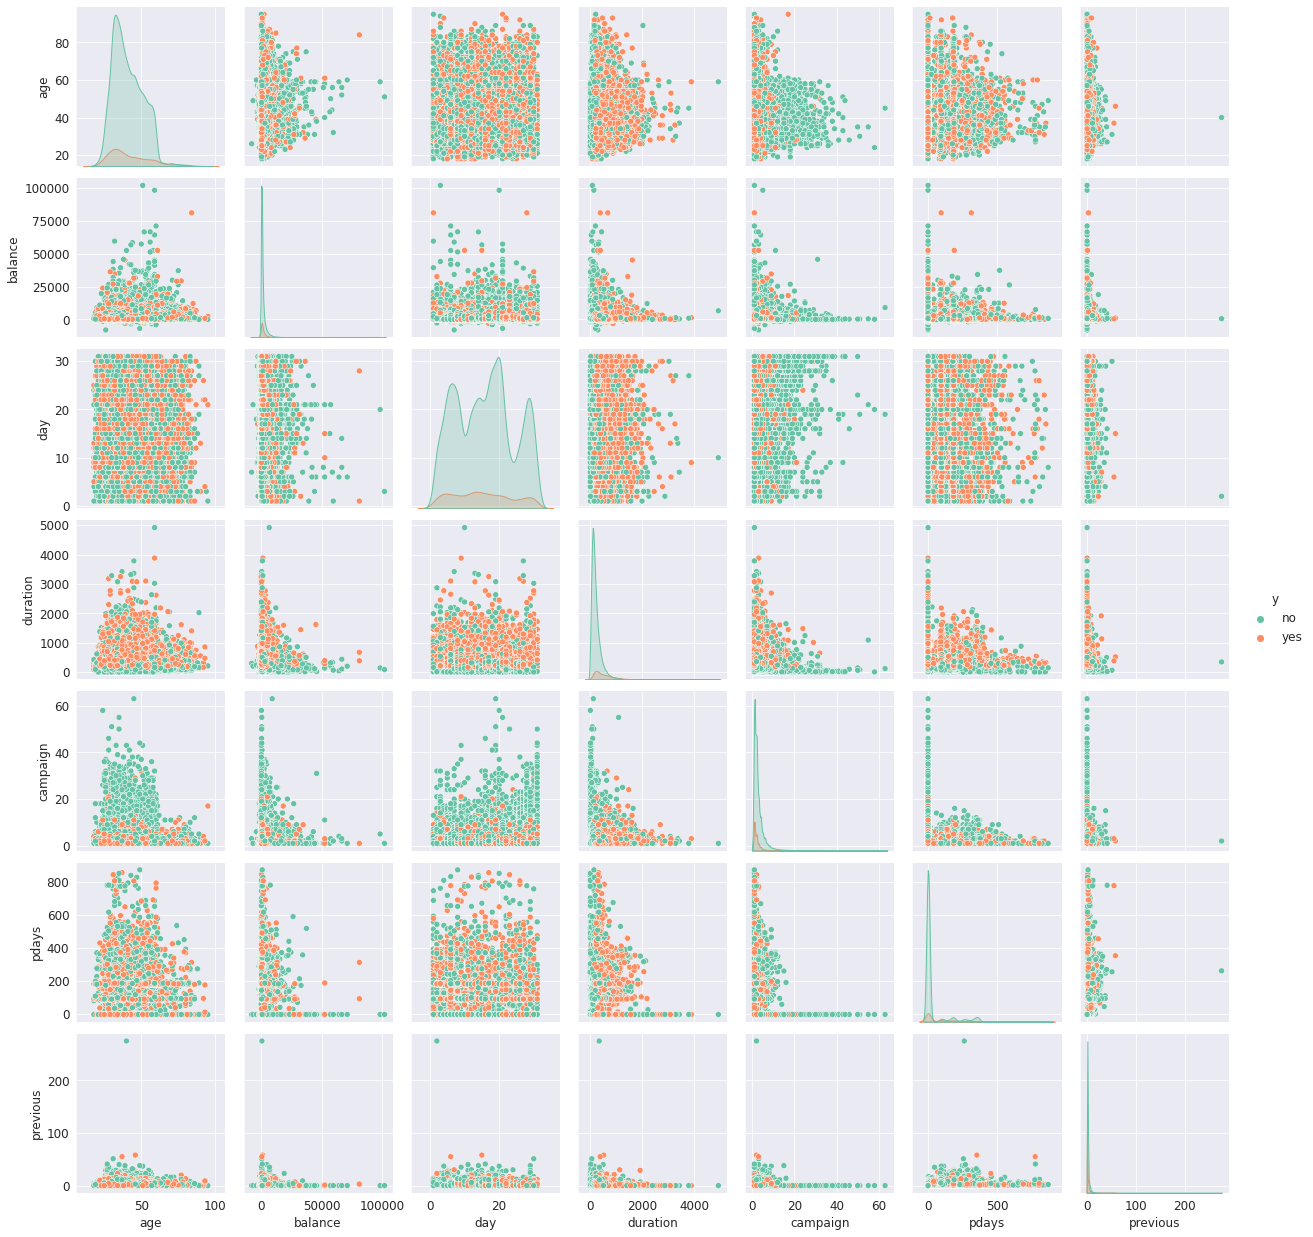

In [26]:
sns.pairplot(df, hue = 'y', palette='Set2') 

# Prepare the data

In [27]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())

Rows     :  45211
Columns  :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


**Removing Multicollinearity**

In [28]:
# Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  '''
  Calculating VIF
  '''

  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
cal_vif(df[[i for i in df.describe().columns if i not in ['y','age']]])#,'previous','age']]])

,variables,VIF
0,balance,1.169835
1,day,2.389664
2,duration,1.654633
3,campaign,1.721139
4,pdays,1.419162
5,previous,1.340212


In [30]:
numeric_features_vif = cal_vif(df[[i for i in df.describe().columns if i not in ['y','pdays']]])["variables"].values #.to_list()
numeric_features_vif

array(['age', 'balance', 'day', 'duration', 'campaign', 'previous'],
      dtype=object)

## Statistical Test

In [36]:
from sklearn.feature_selection import chi2
from scipy import stats

t test

In [32]:
num_f

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [37]:
t_value,p_value=stats.ttest_1samp(df.balance,df.duration)
print(np.mean(t_value))
print(np.mean(p_value))

77.10456669064027
0.0005806673101271911


In [38]:
t_value,p_value=stats.ttest_1samp(df.duration,df.age)
print(np.mean(t_value))
print(np.mean(p_value))

179.35416307691716
0.0


chi2

In [39]:
cat_f

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [40]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [41]:
df_ct=pd.crosstab(index=df['loan'],columns=df['housing'])
df_ct

housing,no,yes
loan,,
no,17204,20763
yes,2877,4367


In [42]:
df_ct.iloc[0].values

array([17204, 20763])

In [43]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([df_ct.iloc[0].values,df_ct.iloc[1].values])

In [44]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  76.97480834381858
p-value  :  1.7315256945310098e-18
Degree for Freedom :  1


Df |	0.5 |	0.10 |	0.05 | 0.02 
--| -- | -- | -- | --
1	| 0.455 |	2.706	| 3.841 |	5.412	
2	| 1.386 |	4.605 |	5.991	| 7.824	
3	| 2.366 |	6.251	| 7.815	| 9.837	

Chi test

**Pearson Correlation**



In [45]:
numeric_features_vif

array(['age', 'balance', 'day', 'duration', 'campaign', 'previous'],
      dtype=object)

In [46]:

num_feature = []
for col in num_f:
  pearson_coef, p_value = stats.pearsonr(df[col],df['y'])
  if abs(round(pearson_coef,2)) >= .2 and p_value < 0.05:
    num_feature.append(col)
  print(pearson_coef, p_value)
num_feature 


UFuncTypeError: ignored

In [ ]:
pearsonr(df[col],df['y'])

ANOVA

In [47]:
anova_df= df[cat_f].groupby(["y"])
anova_df.head(2)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
83,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
86,admin.,married,secondary,no,no,no,unknown,may,unknown,yes


In [48]:
cat_f

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
df.

# Split the data

In [ ]:
df.y.unique()

In [ ]:
df.y = df.y.apply(lambda x: 1 if x=='yes' else 0)

In [ ]:
df_features = df.drop(columns='y')
df_label = df.y

In [ ]:
df_features.head(3)

In [ ]:
df_label.unique()

In [ ]:
num_f = df_features.describe().columns.to_list()
num_f

In [ ]:
cat_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
print(cat_f)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
                                   
                                   ('std_scaler', StandardScaler(), num_f),
                                   ('cat', OneHotEncoder(), cat_f)
        ])
df_prepared = full_pipeline.fit_transform(df_features)

In [ ]:
pd.DataFrame(df_prepared).head(3)

In [ ]:
X = df_prepared
y = df_label 

# Train

In [ ]:
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
def print_model(algo,X_train, X_test, y_train, y_test):
  
  print(algo)
  
  #model fir
  model =algo.fit(X_train, y_train)
  #model predection
  pred_X_test = model.predict(X_test)

  #print classification report
  print('classification report')
  print(classification_report(y_test, pred_X_test))
  print("   ")

  #print accuracy score,precision score,recall score
  print("score")
  print("Overall Accuracy:",accuracy_score(y_test, pred_X_test))
  print("Overall Precision:",precision_score(y_test, pred_X_test, average='macro'))
  print("Overall Recall:",recall_score(y_test, pred_X_test, average='macro'))
  print("   ")
  
  # Print the confusion matrix
  mcm = confusion_matrix(y_test, pred_X_test)
  print('confusion matrix')
  print(mcm)
  print("   ")
  print("   ")

  #probability of 0 & 1
  if algo == sv_cls :
    print("if")
  else:
    print("else")
    y_scores = model.predict_proba(X_test)

    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))

    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')

    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print("   ")

    #print area under curve
    auc = roc_auc_score(y_test,y_scores[:,1])
    print('area under the curve')
    print('AUC: ' + str(auc)) 


In [ ]:
# def print_model(algo,X_train, X_test, y_train, y_test):
#   #probability of 0 & 1
#   print(algo)
#   if algo == sv_cls :
#     print("if")
#   else:
#     print("else")
#   type(algo)

In [ ]:
from sklearn.svm import SVC
sv_cls = SVC(gamma='auto')

print_model(sv_cls,X_train, X_test, y_train, y_test)

SVC(gamma='auto')
classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.28      0.39      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043

   
score
Overall Accuracy: 0.8956098639831914
Overall Precision: 0.7826969073457067
Overall Recall: 0.6310316643214005
   
confusion matrix
[[7791  161]
 [ 783  308]]
   
   
if


LogisticRegression(C=100.0, solver='liblinear')
classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

   
score
Overall Accuracy: 0.8987061815769103
Overall Precision: 0.7844653946134418
Overall Recall: 0.6580989719250425
   
confusion matrix
[[7755  197]
 [ 719  372]]
   
   
else


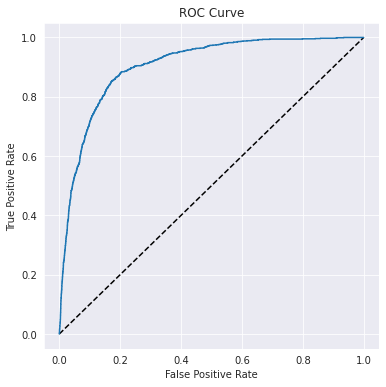

   
area under the curve
AUC: 0.904543668979966


In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
log_reg = LogisticRegression(C=1/reg, solver="liblinear")
# model = log_reg.fit(X_train, y_train)
# print(model)

print_model(log_reg,X_train, X_test, y_train, y_test)

RandomForestClassifier()
classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.42      0.52      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.89      0.91      0.90      9043

   
score
Overall Accuracy: 0.9050093995355524
Overall Precision: 0.7971298631651422
Overall Recall: 0.6952934956208378
   
confusion matrix
[[7727  225]
 [ 634  457]]
   
   
else


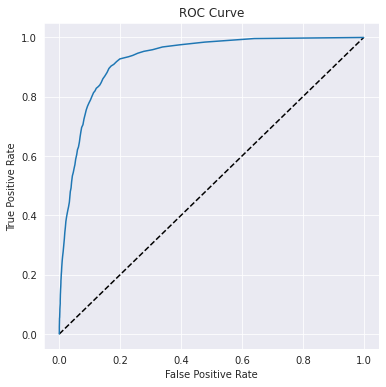

   
area under the curve
AUC: 0.927239882927261


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()

print_model(rf_cls,X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors=3)

print_model(knn_cls,X_train, X_test, y_train, y_test)

KNeighborsClassifier(n_neighbors=3)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)
Fitting 3 folds for each of 12 candidates, totalling 36 fits
classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.60      0.36      0.45      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.66      0.70      9043
weighted avg       0.88      0.89      0.88      9043

   
score
Overall Accuracy: 0.8939511224151278
Overall Precision: 0.7588566176108731
Overall Recall: 0.6636990250393285
   
confusion matrix
[[7691  261]
 [ 698  393]]
   
   
else


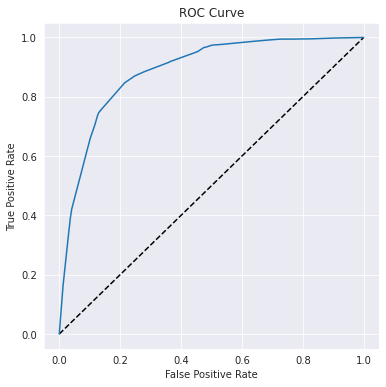

   
area under the curve
AUC: 0.8863938096959392


In [ ]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)

grid_DTC_clf.fit(X_train, y_train)

grid_DTC_clf.best_score_

print_model(grid_DTC_clf,X_train, X_test, y_train, y_test)

In [ ]:
grid_DTC_clf.best_estimator_


DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [ ]:

  feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


  feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


  plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
  plt.xticks(rotation=80)
  plt.title("Feature importances via coefficients")
  plt.show()

IndentationError: ignored